**DATA ACQUISITION STEP**

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#connect to kaggle for dataset downlord
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/NLP/kaggle.json ~/.kaggle/

In [ ]:
#downlord dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip


Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB Dataset.csv        


In [ ]:
#reading only top SOME SAMPLE rows
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv').head(50000)

In [ ]:
len(df)

50000

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
#chk missing values
df.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

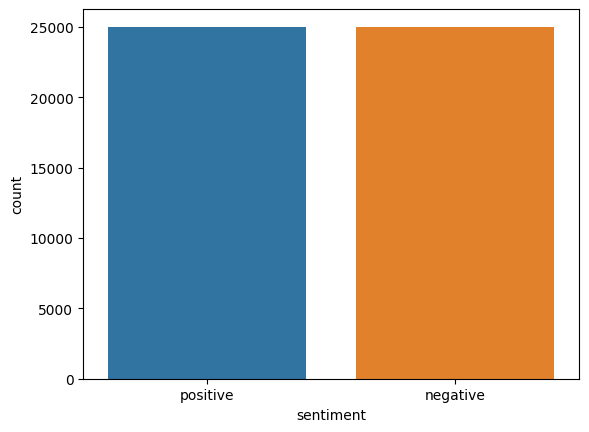

In [ ]:
#check if data is balanced?
import seaborn as sn
sn.countplot(x = 'sentiment',data= df)

**DATA PREPROCESSING STEP**

In [ ]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
reviews = df['review']
sentiments = df['sentiment']
reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

**CONVERT ALL TEXT INTO LOWERCASE**

In [ ]:
reviews = [each.lower() for each in reviews]
reviews[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

**Remove HTML TAGS**

In [ ]:
import re

def removeHtmlTags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [ ]:
#removing tags from all review in reviews by calling removeHtmlTags() for each review
reviews = [removeHtmlTags(review) for review in reviews]
reviews[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

**URL REMOVALS (if present)**

In [ ]:
def removeUrls(text):
  pattern = re.compile(r'http\S+|www\S+')
  return pattern.sub(r'',text)

url1 = "https://www.example.com"
url2 = "http://example.com"
url3 = "www.example.com"
text = f"This is a sample text with embedded URLs: {url1}, {url2}, {url3}. Please visit the websites."

print(text)

removeUrls(text)

This is a sample text with embedded URLs: https://www.example.com, http://example.com, www.example.com. Please visit the websites.


'This is a sample text with embedded URLs:    Please visit the websites.'

**REMOVE PUNCTUATIONS**

In [ ]:
import string

#SLOW
def removePunc(text):
  text = ''.join ([ch for ch in text if ch not in string.punctuation])
  return text

#FAST
def removePuncFast(text):
  text = text.translate(str.maketrans('','',string.punctuation))
  return text

text = "This is a sample string containing punctuation marks: !@#$%^&*()_+{}[];':,.<>?/"
print(removePuncFast(text))
removePunc(text)

This is a sample string containing punctuation marks 


'This is a sample string containing punctuation marks '

In [ ]:
#apply on our dataset
reviews = [removePunc(review) for review in reviews]
reviews[4]

#one issue figured, is matti's became mattis with this

'petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acting i

**Short Form Work Treatment**

In [ ]:
acronyms = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter"
}

def slangTranslate(text):
  newText = []
  newText = [acronyms[w.upper()] if w.upper() in acronyms else w for w in text.split()]
  return ' '.join(newText)

slangTranslate('Hellow TTFN kesy ho TTYL')

'Hellow Ta-Ta For Now! kesy ho Talk To You Later'

In [ ]:
reviews = [slangTranslate(review) for review in reviews ]
reviews[:4]

['one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictu

**SPELLING CORRECTIONS**

In [ ]:
#TextBlob is good for just correcting simple spellings
import textblob
from textblob import TextBlob

def correctSpellings(text):
  return TextBlob(text).correct().string


correctSpellings('i eam finne brother whate abuot yuo')
# reviews = [correctSpellings(r) for r in reviews]

'i am fine brother what about you'

**STOPWORD REMOVAL**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def removestopwords(text):
  toRemove = set(stopwords.words('english'))
  filtered = [w if w not in toRemove else '' for w in text.split() ]
  return ' '.join(filtered)

removestopwords('i am a professional deep learning and machine learning engineers .')

'   professional deep learning  machine learning engineers .'

In [ ]:
reviews = [removestopwords(review) for review in reviews]
reviews[:2]

['one    reviewers  mentioned   watching  1 oz episode youll  hooked   right    exactly  happened  methe first thing  struck   oz   brutality  unflinching scenes  violence  set  right   word go trust      show   faint hearted  timid  show pulls  punches  regards  drugs sex  violence   hardcore   classic use   wordit  called oz     nickname given   oswald maximum security state penitentary  focuses mainly  emerald city  experimental section   prison    cells  glass fronts  face inwards  privacy   high   agenda em city  home  manyaryans muslims gangstas latinos christians italians irish  moreso scuffles death stares dodgy dealings  shady agreements  never far awayi would say  main appeal   show  due   fact   goes   shows wouldnt dare forget pretty pictures painted  mainstream audiences forget charm forget romanceoz doesnt mess around  first episode  ever saw struck    nasty   surreal  couldnt say   ready      watched   developed  taste  oz  got accustomed   high levels  graphic violence 

**REMOVE EMOJI**

In [ ]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    cleaned = emoji_pattern.sub(r'',text)
    return cleaned

# Example usage
text = "Hello! 😃 How are you? 🌞"
cleaned_text = remove_emojis(text)
print(cleaned_text)

Hello!  How are you? 


**REPLACE EMOJI**

In [ ]:
!pip install emoji
import emoji
def replaceEmoji (text):
  return emoji.demojize(text)
replaceEmoji('Hello! 😃 How are you? 🌞')

'Hello! :grinning_face_with_big_eyes: How are you? :sun_with_face:'

**WORD TOKENIZATION**

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def word_tokenization(text):
  return word_tokenize(text)

word_tokenization('hello i am going to australia!')

['hello', 'i', 'am', 'going', 'to', 'australia', '!']

In [ ]:
#apply to DS
reviews = [word_tokenization(review) for review in reviews ]
reviews[:2]

[['one',
  'reviewers',
  'mentioned',
  'watching',
  '1',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'methe',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordit',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  '

**SENTANCE TOKENIZE **

In [ ]:
from nltk.tokenize import sent_tokenize

def sent_tokenization(text):
  res= sent_tokenize(text)
  return res

sentences = [
  "The quick brown fox jumps over the lazy dog.",
  "I am running in the park.",
  "She has a collection of books on various topics.",
  "They are playing football in the field.",
  "The sun sets in the west."
]
[sent_tokenization(r) for r in sentences]

[['The quick brown fox jumps over the lazy dog.'],
 ['I am running in the park.'],
 ['She has a collection of books on various topics.'],
 ['They are playing football in the field.'],
 ['The sun sets in the west.']]

**TOKENIZATION WITH SPACY (BETTER IN SOME CASES)**

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
sentence1 = "Hello, how are you?"
sentence2 = "I love to code in Python."
sentence3 = "The quick brown fox jumps over the lazy dog."
sentence4 = "I enjoy reading books and listening to music."
sentence5 = "Can you please pass me the salt and pepper?"


doc1 = nlp(sentence1)
doc2 = nlp(sentence2)
doc3 = nlp(sentence3)

for token in doc3:
  print(token)

The
quick
brown
fox
jumps
over
the
lazy
dog
.


**STEMMING **

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas".

EXAMPLE:
playing --> play
played --> play
plays --> play
player --> player
happiness --> happi
happier --> happier
happiest --> happiest


**Stemming vs Lemmitization**


**Stemming** is fast,sometimes generates words that maynot be part of language(SO use it when you are not showing output to user)


**Lemmitization** is slower then stemming but accurate words generation.

In [ ]:
from nltk.stem import PorterStemmer

pStemmer = PorterStemmer()

def stemming(text):
  # words = text.split()
  stemmed_words = [pStemmer.stem(word) for word in text]
  return ' '.join(stemmed_words)


stemming(['walk', 'walking', 'walked'])

'walk walk walk'

In [ ]:
#applying to reviews
reviews = [stemming(review) for review in reviews]
reviews[:2]

['one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom 

**Lemminization**

POS must be specifies when calling Lemmitizer.lemitize(text, pos ='v/n/a/o')

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  # Download required resource for lemmatization


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#not applied to reviews
lemi = WordNetLemmatizer()
sentences  = [
  "The quick brown fox jumps over the lazy dog.",
  "I am running in the park.",
  "She has a collection of books on various topics.",
  "They are playing football in the field.",
  "The sun sets in the west."
]


def lemitization(text):
  lemitized = [lemi.lemmatize(w,pos='v') for w in text]
  return ' '.join(lemitized)
sentences = [word_tokenization(s) for s in sentences]
[lemitization(sentence) for sentence in sentences]

['The quick brown fox jump over the lazy dog .',
 'I be run in the park .',
 'She have a collection of book on various topics .',
 'They be play football in the field .',
 'The sun set in the west .']

In [ ]:
#not applied to reviews
lemi = WordNetLemmatizer()
sentences  = [
  "The quick brown fox jumps over the lazy dog.",
  "I am running in the park.",
  "She has a collection of books on various topics.",
  "They are playing football in the field.",
  "The sun sets in the west."
]


def lemitization(text):
  lemitized = [lemi.lemmatize(w,pos='v') for w in text]
  return ' '.join(lemitized)
sentences = [word_tokenization(s) for s in sentences]
[lemitization(sentence) for sentence in sentences]

['The quick brown fox jump over the lazy dog .',
 'I be run in the park .',
 'She have a collection of book on various topics .',
 'They be play football in the field .',
 'The sun set in the west .']

In [ ]:
reviews[0]

'one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom c

**FEATURE ENGINEERING/ Text Representation STEP**

Text representation:

C = corpus (total words in data)
V= vocabulary (unique words in corpus)
D= document (unique sentance)
W = word (each single word)


1- 1Hot Encoding:
	- each word will be converted to vector of size equal to vocab value.
	- one sentance will be represented by array of rows(rows equal to unique words in sentance/document)

	pros:
	- intuitive
	- easy implementation

	cons:
	- spare vectors (useless and large no of 0's -- only 1 one in each vector for each word)
	- no fixed size (if documents size is'nt same vectors dimentions will also not be -- but machine learning models require input of same dimentions)
	- OOV (ot of vocabulary) if test input contain new word then model will'nt able to recognize.
	- no capturing of symantic meaning (distence btw words)
Not used now aday in any model.



2-Bag of words / Bag of unigram(1,1):
	- make vector of vocabolary and then check each doc/sentance ,count no of time each word come and fill value against it in vector
	- good for text classification tasks .
 	- order of words doesn't matters

 	pros:
 	- intuitive and simple
 	- handle variable size input no need to add new dimention for new input , because it just count freq of word and put it in
 	- handle OOV prob bcz it just don't take them into account only care about words in vocab
 	- not capturing best symmetic info but better than 1HE technique



 	cons:
 	- sparcity same as 1HE cz overfitting
 	- as ignoring OOV words comming in input ,not taking that info in account
 	- not focusing on sequence or order of words
 	- cosine simmilarity btw vectors may mislead model in some cases .


 	e.g:
 		d1 : this is a very good cofee.
 		d2 : this is not a very good cofee.
 		here acc to BOW tech these two vec are close to each other becasue of max num of same words.


2.1- Bag of bi-gram(2,2):
	- just the way vocabory build is diff in bi-gram take continously 2 words together in vocab and thenc ount no of time each word come and fill value against it in vector

	pros:
	- this will increase the cosine diff btw different sentances like dicussed above/ able to capture symmentic meaning.
	- intuitive and simple

	cons:
	- vocab dimentionality will increase as n goes above make model slow
	- OOV still there


2.2- BAG OF N-GRAMS(N,N):
	if (1,2): it mean vocab contain both uni-grams pair and bi-grams... and soo on


3- TFIDF:
	- find tf and idf ans multiply
	- tf(t,d) = # of occur of t in d / total # of t  in d
	- idf(t) = log(total # of docs(d) in corpus / # of d  with term (t)in them) + 1

	pros:
	- informative retrival sys me use hota(sub branch of  nlp)


	cons:
	- sparce
	- OOV
	- large dimentionality
	- symmentic meaning still not capturing in all of these tech

4- Custom features	: One with domain knowledge define own features.

In [ ]:
#applying One Hot Incoding
# Problem 3

# Apply One Hot Encoding
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

k = ['This is the first sentence',
     'This is the second sentence!',
     'And this is the third sentence?',
     'This is the fourth sentence']

# Fit and transform the documents
one_hot_encoded = vectorizer.fit_transform(k)

# Convert the one-hot encoded matrix to a list of lists
one_hot_encoded_list = one_hot_encoded.toarray().tolist()

print("One-Hot Encoded Matrix:")
for document, vector in zip(k, one_hot_encoded_list):
    print(document)
    print(vector)
    print("-" * 30)



One-Hot Encoded Matrix:
This is the first sentence
[0, 1, 0, 1, 0, 1, 1, 0, 1]
------------------------------
This is the second sentence!
[0, 0, 0, 1, 1, 1, 1, 0, 1]
------------------------------
And this is the third sentence?
[1, 0, 0, 1, 0, 1, 1, 1, 1]
------------------------------
This is the fourth sentence
[0, 0, 1, 1, 0, 1, 1, 0, 1]
------------------------------


In [ ]:
len(reviews)

50000

In [ ]:
#applying bag of n-gram words on our dataset

vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit and transform the documents
bag_of_words = vectorizer.fit_transform(reviews)


# Convert the bag-of-words encoded matrix to a list of lists
bag_of_words_list = bag_of_words.toarray().tolist()


In [ ]:
# Print the  bag-of-words encoded matrix
print("Bag-of-N-gram Encoded Matrix:")
for document, vector in zip(reviews, bag_of_words_list):
    print(document)
    print(vector)
    print("-" * 30)

**MODELLING STEP**

**EVALuaTION AND DEPLOYEMNT STEP**